
# GRIP - The Sparks Foundation 

## Author : KARTHIGA K 

## Data Science and Business Analytics


## Task 1: Prediction using Supervised ML

### Simple Linear Regression

AIM : To predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 







In [3]:
# Importing required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [4]:
# Reading data 

url = "http://bit.ly/w-data"
cf_data = pd.read_csv(url)
print("Data imported successfully")
cf_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data description and checking for missing values

In [19]:
print("The data set has {} rows and {}  columns".format(cf_data.shape[0],cf_data.shape[1]))
display(cf_data.describe())
cf_data.isnull() 




The data set has 25 rows and 2  columns


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


## Data Visualization

Using Scatter plot to visually inspect the data to see whether X and Y are linearly related.


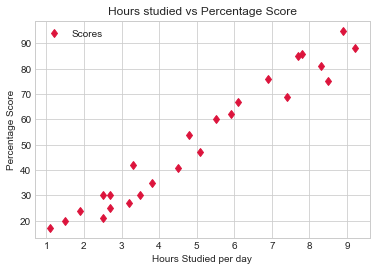

In [10]:
# Plotting the distribution of scores

cf_data.plot(x='Hours', y='Scores',style="o",marker="d", c="crimson")
plt.style.use("seaborn-whitegrid")
plt.title('Hours studied vs Percentage Score')  
plt.xlabel('Hours Studied per day')  
plt.ylabel('Percentage Score')  
plt.show() 

### The above graph clearly depicts that there is a positive linear relation between the number of hours studied and percentage score.



## Preparing the data

Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [21]:
X = cf_data.iloc[:, :-1].values  
y = cf_data.iloc[:, 1].values  

Splitting the data into training and test sets.

In [22]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 


## Training the Algorithm


In [24]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


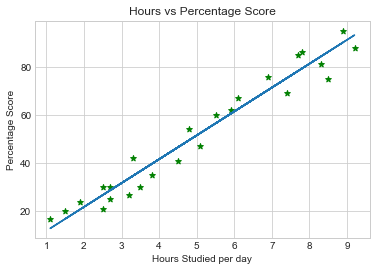

In [26]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data

plt.scatter(X, y, marker="*",c="green")
plt.plot(X, line);
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied per day')  
plt.ylabel('Percentage Score')  
plt.show() 

## Making Predictions

In [28]:
print(X_test) 
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [29]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033



### What will be predicted score if a student studies for 9.25 hrs/ day?


In [25]:
hours = [9.25]
pred_score = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))      

No of Hours = [9.25]
Predicted Score = 93.69173248737538


###  The predicted score for a student studying for 9.25 hrs per day is approximately 94.


## Evaluating the Model

### Mean Absolute Error

The mean absolute error of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set. Each prediction error is the difference between the true value and the predicted value for the instance.



In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


#### Lower mae values are better. 

### Coefficient of Determination

It is the percentage of the response variable variation that is explained by the linear model.


In [34]:
print(" R squared value:", metrics.r2_score(y_test, y_pred))

 R squared value: 0.9454906892105356


94% of the variations in the variable Percentage scores is explained by the variable No of Hours of study.